In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf

In [3]:

filename = "all_long_v3.4_10yrs.db"
name = filename.replace('.db', '')
out_dir = 'temp'
results_db = maf.db.ResultsDb(out_dir=out_dir)


Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


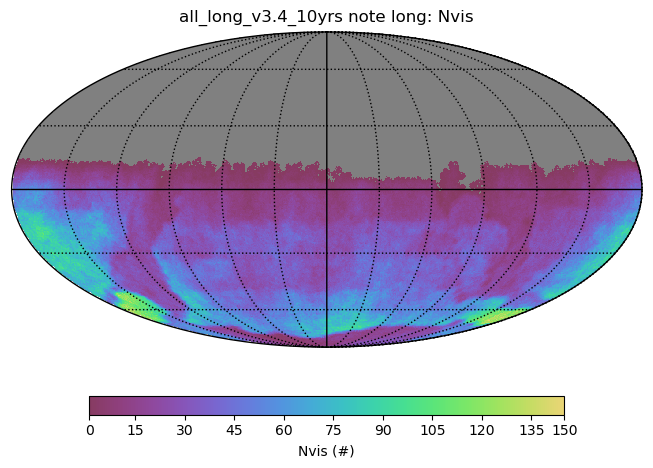

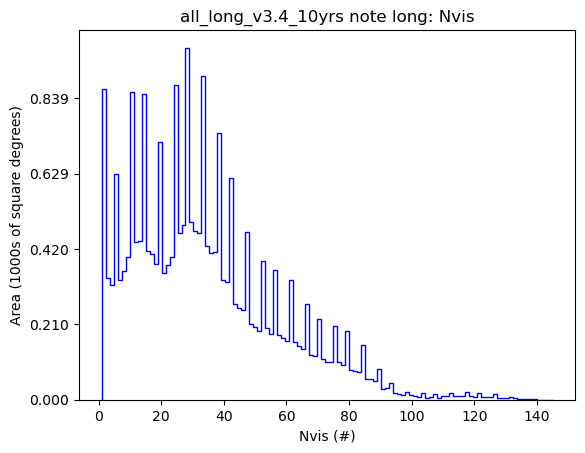

In [8]:
bundle_list = []

# col here could be anything
metric = maf.metrics.CountMetric(col=['night'], metric_name='Nvis')
# Select all the visits. Could do something like 'filter="r"' 
sql = 'note = "long"'
slicer = maf.slicers.HealpixSlicer()
plot_dict = {}
bundle_list.append(maf.MetricBundle(metric, slicer, sql, run_name=name, plot_dict=plot_dict))

bd = maf.metricBundles.make_bundles_dict_from_list(bundle_list)
bg = maf.metricBundles.MetricBundleGroup(bd, filename, out_dir=out_dir, results_db=results_db)
bg.run_all()
bg.plot_all(closefigs=False)